In [1]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("database_IND.csv")   
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

In [5]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

<AxesSubplot:>

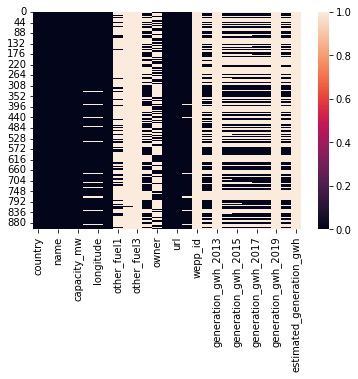

In [6]:
sns.heatmap(df.isnull())

From above we can see that the data contains many null values. We will treat these null values ahead.

# Data Preprocessing

The above data also contain lots of columns & information which are not useful for our Model. 

Removing such columns which do not play any role in Data Visualization & Prediction.

In [7]:
df.drop({'country','country_long','name','gppd_idnr','latitude','longitude','owner','source','url','geolocation_source','wepp_id','year_of_capacity_data','generation_data_source'},axis=1,inplace=True)  # Removing Non-useful columns
df.head()

,capacity_mw,primary_fuel,other_fuel1,other_fuel2,other_fuel3,commissioning_year,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,estimated_generation_gwh
0,2.5,Solar,NaN,NaN,NaN,2011.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,98.0,Coal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,39.2,Wind,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,135.0,Gas,NaN,NaN,NaN,2004.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,NaN
4,1800.0,Coal,Oil,NaN,NaN,2015.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,NaN


In [8]:
df.isnull().sum()

capacity_mw                   0
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
estimated_generation_gwh    907
dtype: int64

Removing columns which contains all the null values i.e. Columns is empty with no entry.

In [9]:
df.drop({'other_fuel2','other_fuel3','generation_gwh_2013','generation_gwh_2019','estimated_generation_gwh'},axis=1,inplace=True)  # Removing empty columns
df.head()

,capacity_mw,primary_fuel,other_fuel1,commissioning_year,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,Solar,NaN,2011.0,NaN,NaN,NaN,NaN,NaN
1,98.0,Coal,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,39.2,Wind,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,135.0,Gas,NaN,2004.0,617.789264,843.747,886.004428,663.774500,626.239128
4,1800.0,Coal,Oil,2015.0,3035.550000,5916.370,6243.000000,5385.579736,7279.000000


In [10]:
df.describe()

,capacity_mw,commissioning_year,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
count,907.000000,527.000000,398.000000,422.000000,434.000000,440.000000,448.000000
mean,326.223755,1997.091082,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
std,590.085456,17.082868,4026.440035,4194.596959,4162.884308,4196.991169,4314.880456
min,0.000000,1927.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.725000,1988.000000,223.557672,176.381063,188.285252,177.874930,193.378250
50%,59.200000,2001.000000,801.123775,711.181225,737.205450,817.977250,751.644375
75%,385.250000,2012.000000,3035.306250,3084.121250,3282.861313,3275.690475,3143.535900
max,4760.000000,2018.000000,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000


<AxesSubplot:>

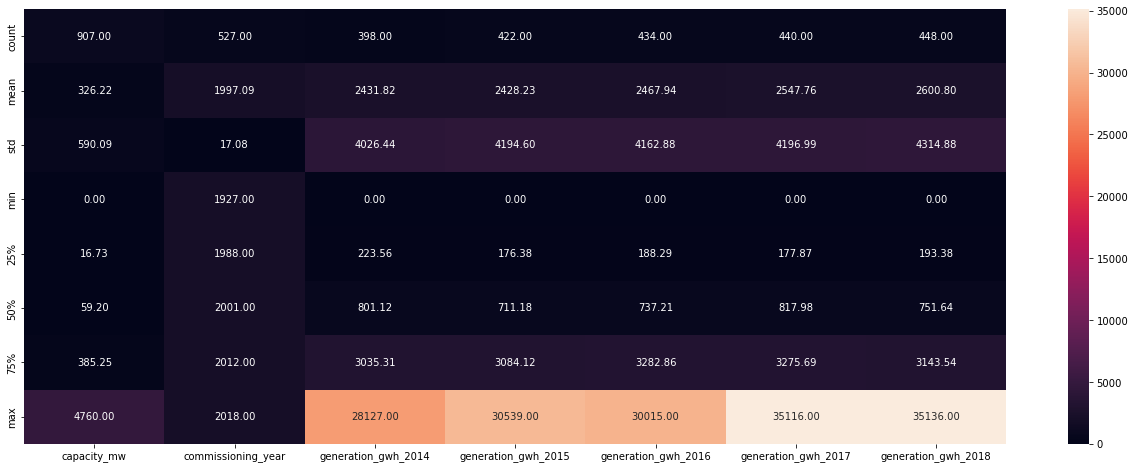

In [11]:
plt.figure(figsize=(22,8))
sns.heatmap(df.describe(),annot=True,fmt="0.2f")

OBSERVATIONS:-

1. Mean > Median for 'capacity_mw', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018' means that data in these columns is Right Skewed Data.
2. Also, Big difference present b/w 75% percentile & Maximum of the column for 'capacity_mw','generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018' means that ouliers are present in these columns.

# Exploratory Data Analysis & Visualization

UNIVARATE ANALYSIS

In [12]:
df.primary_fuel.unique()

array(['Solar', 'Coal', 'Wind', 'Gas', 'Hydro', 'Biomass', 'Oil',
       'Nuclear'], dtype=object)

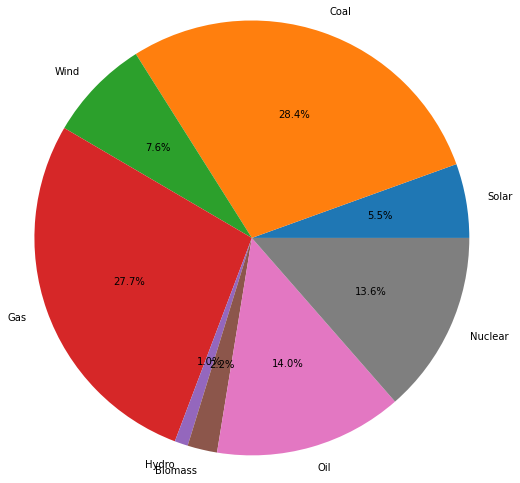

Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64


In [13]:
at = df.groupby('primary_fuel')['primary_fuel'].count()
plt.pie(at, labels=['Solar', 'Coal', 'Wind', 'Gas', 'Hydro', 'Biomass', 'Oil','Nuclear'], radius=2.5, autopct='%1.1f%%')
plt.show()
print(df.primary_fuel.value_counts())

OBSERVATIONS:- 
    
   1. From above chart we can see that the Majority(More than 50%) of Power plants in INDIA run on Coal or Hydro. With coal run power plants being highest.
   2. There are very less Nuclear Power plants(Only 1%) in India.

In [14]:
df.other_fuel1.value_counts()

Oil             195
Gas               2
Cogeneration      1
Name: other_fuel1, dtype: int64

Almost all Power plants use Oil as Secondary Fuel.

DISTRIBUTION PLOTS

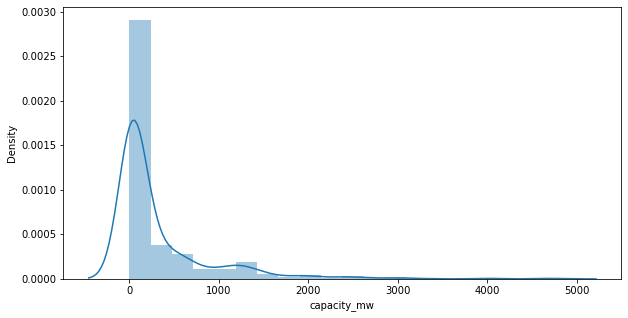

In [15]:
plt.figure(figsize=(10,5))
sns.distplot(df['capacity_mw'],bins=20)
plt.show()

From above plot we can see that most of the Power Plants generate power b/w 100-400 mw.

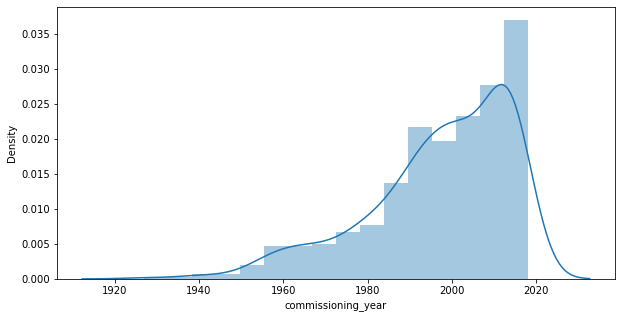

In [16]:
plt.figure(figsize=(10,5))
sns.distplot(df['commissioning_year'])
plt.show()

Majority on the Power Plants in India were commisioned year 2000 - 2015. 

Also, we can see that more & more power plants are built as the years keep progressing. To support the power demand of the country.

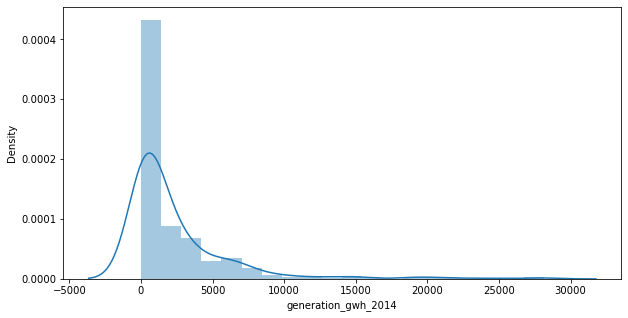

In [17]:
plt.figure(figsize=(10,5))
sns.distplot(df['generation_gwh_2014'],bins=20)
plt.show()

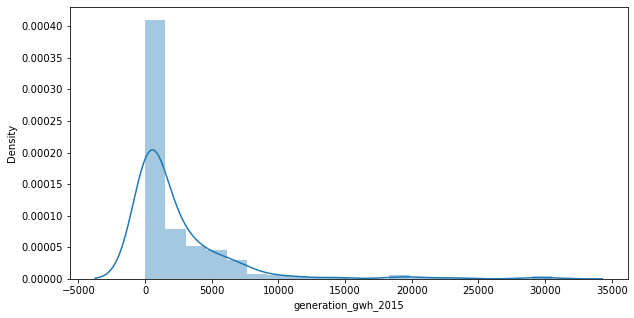

In [18]:
plt.figure(figsize=(10,5))
sns.distplot(df['generation_gwh_2015'],bins=20)
plt.show()

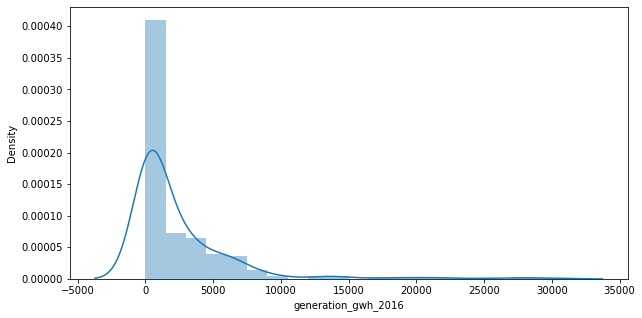

In [19]:
plt.figure(figsize=(10,5))
sns.distplot(df['generation_gwh_2016'],bins=20)
plt.show()

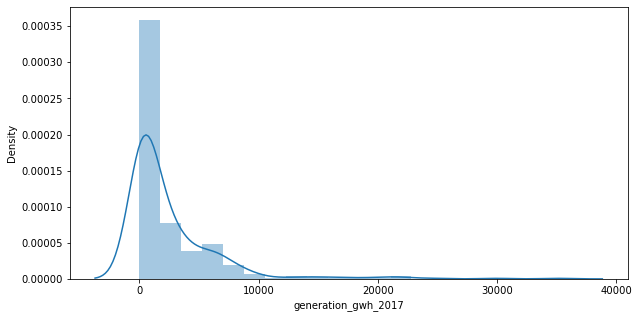

In [20]:
plt.figure(figsize=(10,5))
sns.distplot(df['generation_gwh_2017'],bins=20)
plt.show()

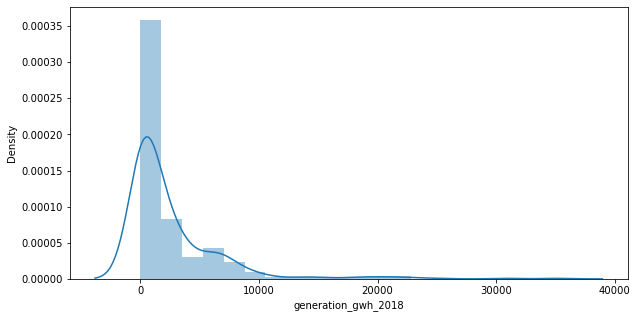

In [21]:
plt.figure(figsize=(10,5))
sns.distplot(df['generation_gwh_2018'],bins=20)
plt.show()

OBSERVATIONS:From above Distribution plots of Power generation each year we can see that Power generated along the years from all Power Plants is almost similar & majority of Power Plants produce power b/w 0 - 2000 gwh over the years.

BIVARATE ANALYSIS

<function matplotlib.pyplot.show(close=None, block=None)>

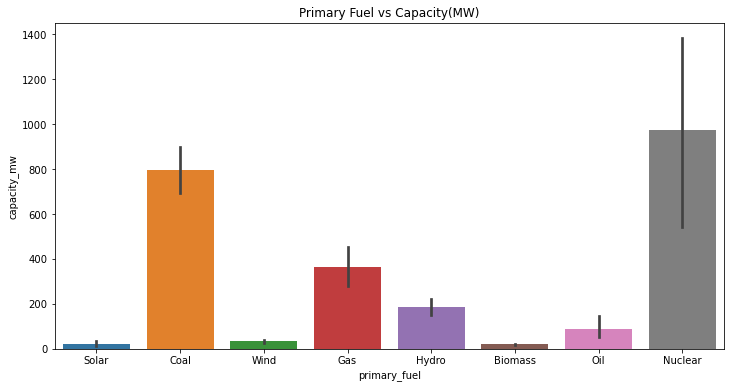

In [22]:
plt.figure(figsize=(12,6))
sns.barplot(x='primary_fuel',y='capacity_mw',data=df)
plt.title("Primary Fuel vs Capacity(MW)")
plt.show

From above plot we can see that :- 
   1. Power Plants running on Nuclear Energy produce most Electricity or Power. 
   2. Whereas, Power Plants running on Biomass, Solar have very less capacity.

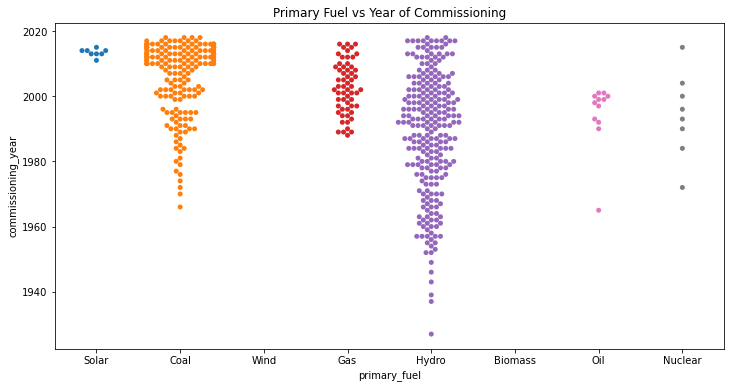

In [23]:
plt.figure(figsize=(12,6))
sns.swarmplot(x='primary_fuel',y='commissioning_year',data=df)
plt.title("Primary Fuel vs Year of Commissioning")
plt.show()

From above plot we can see that: - 
   1. Hydro Power plants were first ones to be commissioned & used in India.
   2. Almost all Oil run Power Plants were built & commisioned b/w year 1990-2000.
   3. Nuclear Power plant technology came into picture in Year around 1970.
   4. Solar run Power plants came into picture after Year 2010. 

<function matplotlib.pyplot.show(close=None, block=None)>

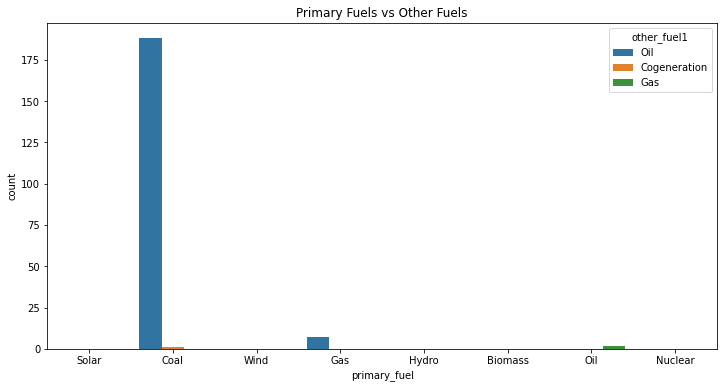

In [24]:
plt.figure(figsize=(12,6))
sns.countplot(x='primary_fuel',hue='other_fuel1',data=df)
plt.title("Primary Fuels vs Other Fuels")
plt.show

From above plot we can see that Oil in use as Secondary Fuel in Power plants that are running on Coal or Gas.

Also, cogenaration is only used in Coal run Power Plants & Gas is used in Oil run Power Plants as the secondary fuel.

REGRESSION PLOTS

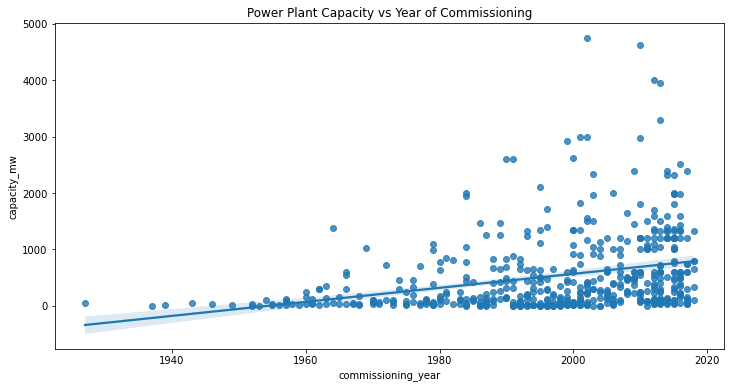

In [25]:
plt.figure(figsize=(12,6))
sns.regplot(x='commissioning_year',y='capacity_mw',data=df)
plt.title("Power Plant Capacity vs Year of Commissioning")
plt.show()

From above plot we can see that as the Years are increasing the Capacities of the Commisioned Power Plants have also increased. And the New power plants have more capacity than the Old ones. 

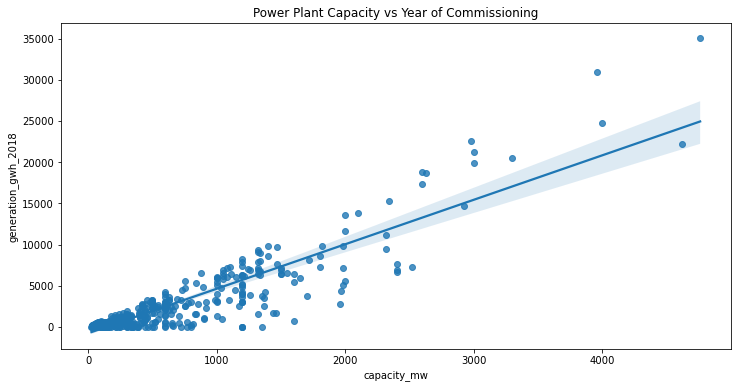

In [26]:
plt.figure(figsize=(12,6))
sns.regplot(x='capacity_mw',y='generation_gwh_2018',data=df)
plt.title("Power Plant Capacity vs Year of Commissioning")
plt.show()

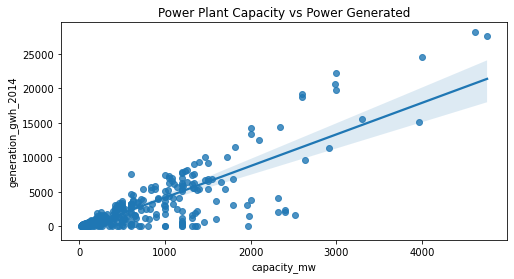

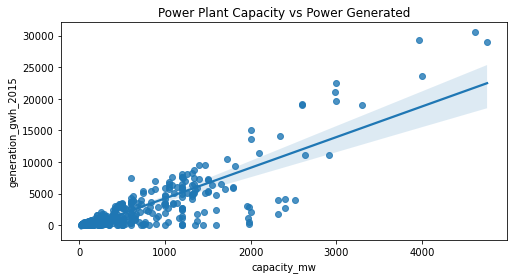

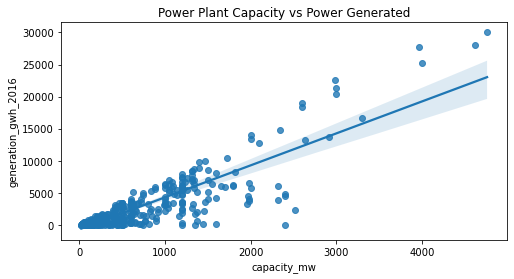

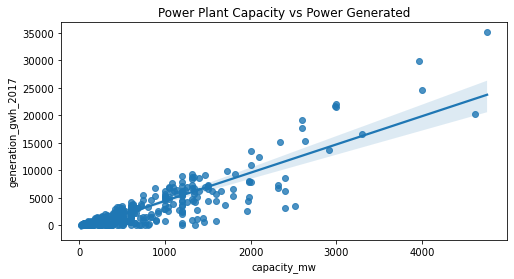

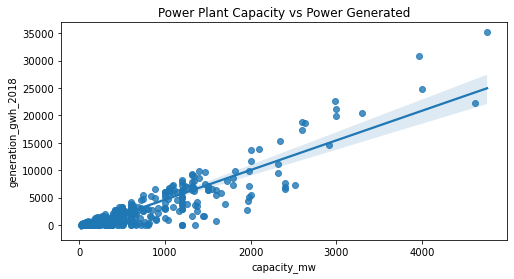

In [27]:
for i in df[['generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018']]:
    plt.figure(figsize=(8,4))
    sns.regplot(x='capacity_mw',y=i,data=df)
    plt.title("Power Plant Capacity vs Power Generated")
    plt.show()

From above plots we can see that the Power Plants with more capacity generate more power over the Years. i.e. Power generated over the years is Strongly +ve Correlated with the Power Plant Capacity.

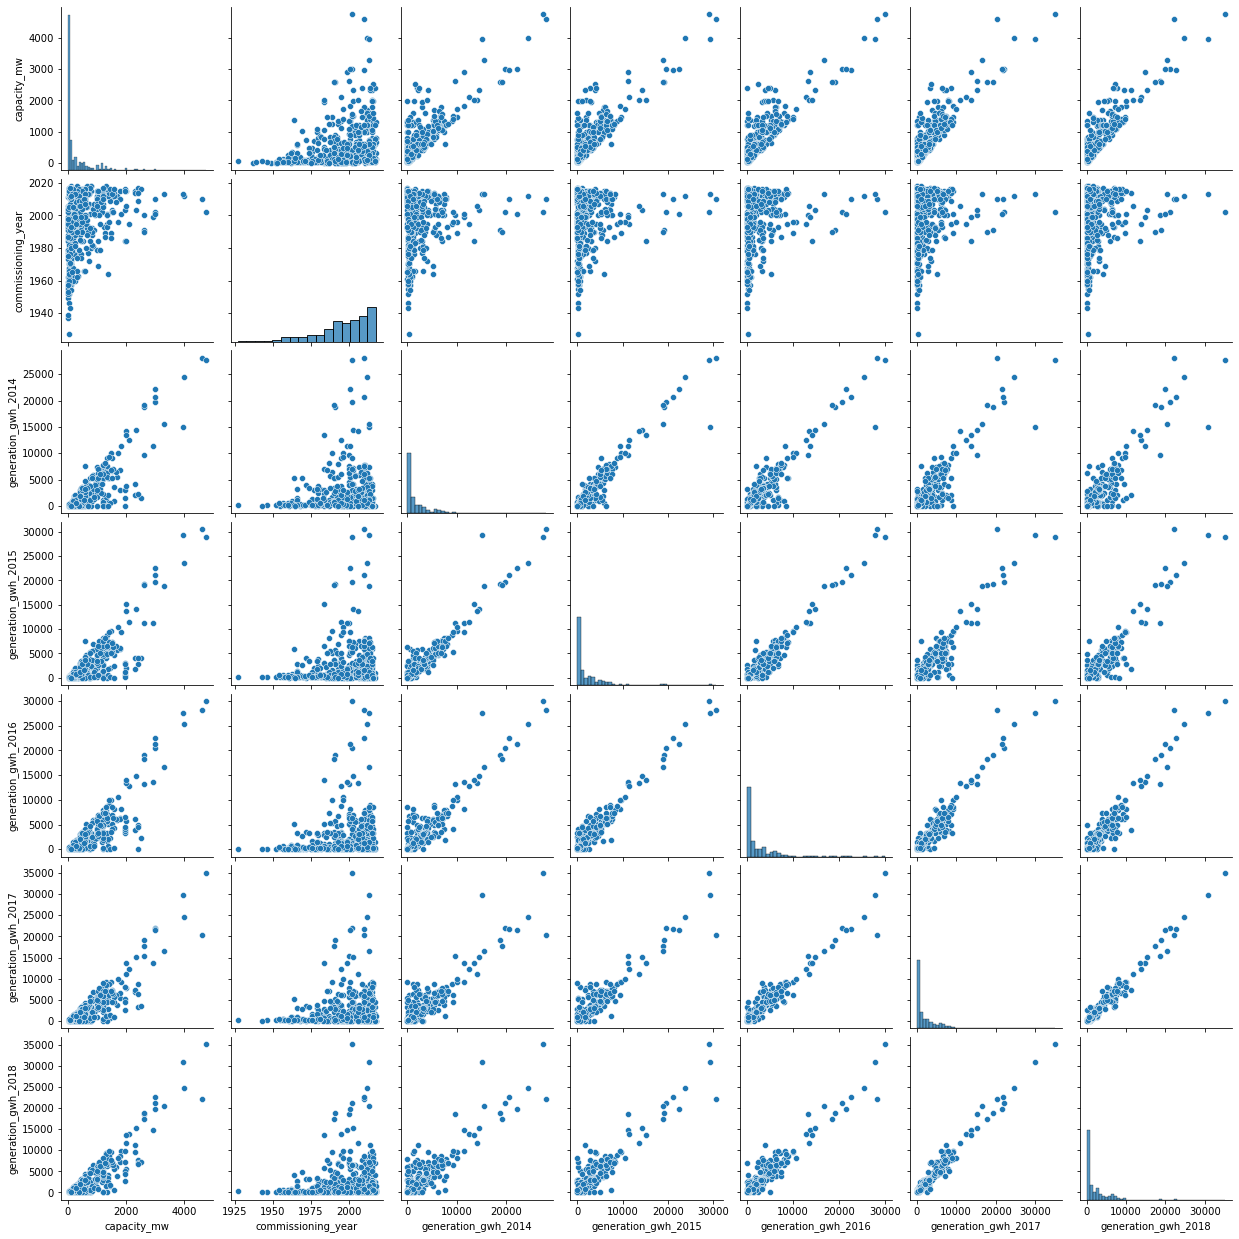

In [28]:
sns.pairplot(df)

Dropping 'other_fuel1' Column as it has 709 null values out of 907 Entries. And filling up the null values will decrease the Model Performance.

In [29]:
df.drop({'other_fuel1'},axis=1,inplace=True)  # Removing empty columns
df.head()

,capacity_mw,primary_fuel,commissioning_year,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,Solar,2011.0,NaN,NaN,NaN,NaN,NaN
1,98.0,Coal,NaN,NaN,NaN,NaN,NaN,NaN
2,39.2,Wind,NaN,NaN,NaN,NaN,NaN,NaN
3,135.0,Gas,2004.0,617.789264,843.747,886.004428,663.774500,626.239128
4,1800.0,Coal,2015.0,3035.550000,5916.370,6243.000000,5385.579736,7279.000000


# Label Encoding

Converting the Columns with String values into integer values to use these features for M.L. model.

In [30]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['primary_fuel']=le.fit_transform(df['primary_fuel'])
df.head()

,capacity_mw,primary_fuel,commissioning_year,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,6,2011.0,NaN,NaN,NaN,NaN,NaN
1,98.0,1,NaN,NaN,NaN,NaN,NaN,NaN
2,39.2,7,NaN,NaN,NaN,NaN,NaN,NaN
3,135.0,2,2004.0,617.789264,843.747,886.004428,663.774500,626.239128
4,1800.0,1,2015.0,3035.550000,5916.370,6243.000000,5385.579736,7279.000000


As we can see now that the Primary_fuel Column with String Values has been converted to Integer values using Label Encoding.

# CORRELATION

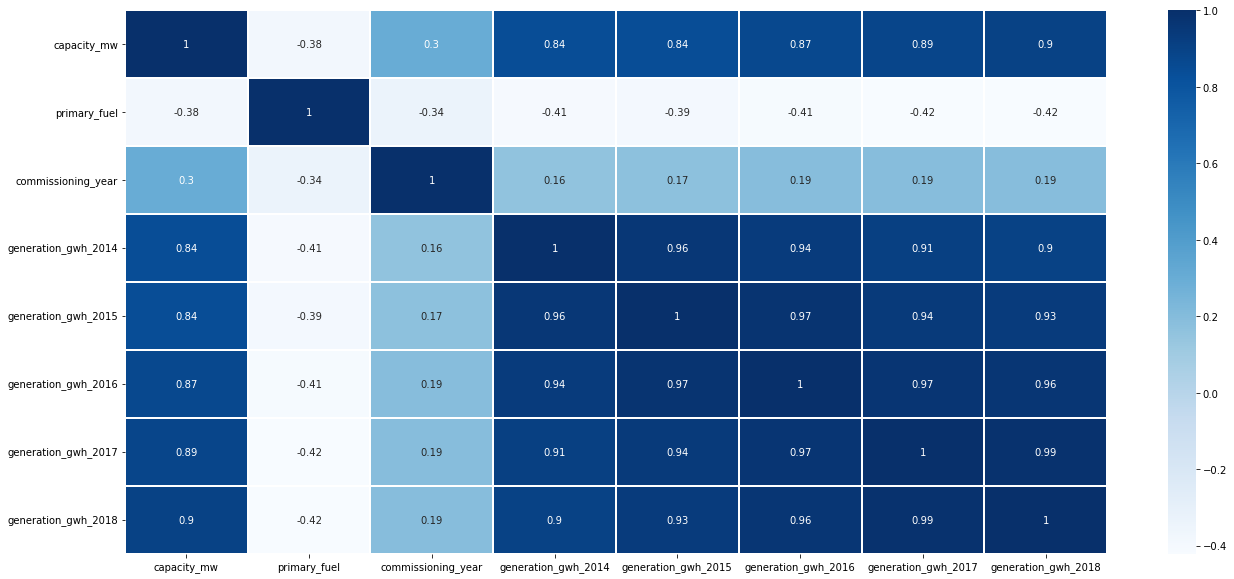

In [31]:
plt.figure(figsize=(22,10))
sns.heatmap(df.corr(),annot=True,linewidths = 2,cmap="Blues")
plt.show()

From above correlation chart we can see that the some columns are having high correlation(>0.7) b/w them. These columns are:-

   1. capacity_mw & generation_gwh_2014
   2. capacity_mw & generation_gwh_2015
   3. capacity_mw & generation_gwh_2016
   4. capacity_mw & generation_gwh_2017
   5. capacity_mw & generation_gwh_2018
   6. And all the Power generation count columns amoung them.

CORRELATION with the Capacity(MW) Column

In [32]:
df.corr()['capacity_mw'].sort_values()

primary_fuel          -0.380395
commissioning_year     0.304087
generation_gwh_2014    0.839094
generation_gwh_2015    0.844352
generation_gwh_2016    0.870620
generation_gwh_2017    0.886673
generation_gwh_2018    0.901918
capacity_mw            1.000000
Name: capacity_mw, dtype: float64

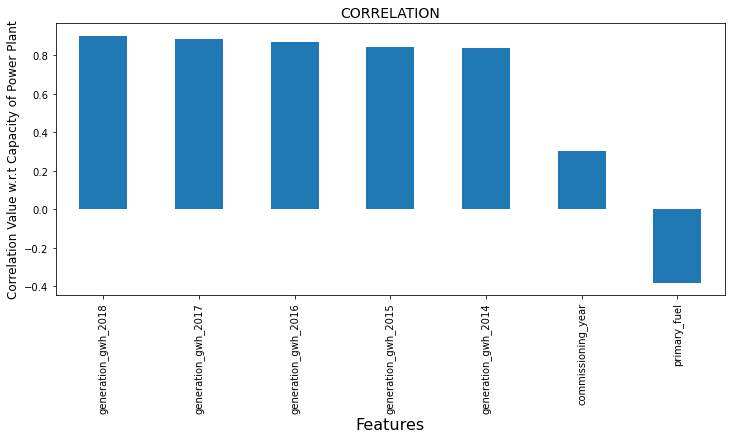

In [33]:
plt.figure(figsize=(12,5))
df.corr()['capacity_mw'].sort_values(ascending=False).drop(['capacity_mw']).plot(kind='bar')
plt.xlabel("Features",fontsize=16)
plt.ylabel("Correlation Value w.r.t Capacity of Power Plant",fontsize=12)
plt.title("CORRELATION",fontsize=14)
plt.show()

From above we can see that all columns except primary fuel have strong +ve correlation with the Capacity column. Whereas Primary fuel has -ve correlation with the Plant Capacity.

CORRELATION with the Primary Fuel Column

In [34]:
df.corr()['primary_fuel'].sort_values()

generation_gwh_2017   -0.421736
generation_gwh_2018   -0.421518
generation_gwh_2016   -0.408951
generation_gwh_2014   -0.405019
generation_gwh_2015   -0.393335
capacity_mw           -0.380395
commissioning_year    -0.336501
primary_fuel           1.000000
Name: primary_fuel, dtype: float64

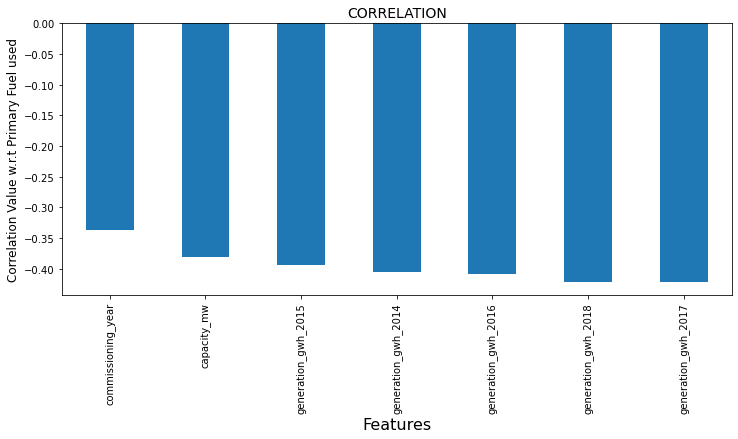

In [35]:
plt.figure(figsize=(12,5))
df.corr()['primary_fuel'].sort_values(ascending=False).drop(['primary_fuel']).plot(kind='bar')
plt.xlabel("Features",fontsize=16)
plt.ylabel("Correlation Value w.r.t Primary Fuel used",fontsize=12)
plt.title("CORRELATION",fontsize=14)
plt.show()

From above plot we can see that all the Feature Columns have -ve Correlation with the Primary Fuel Column.

# Treating Missing Values

In [36]:
df.isnull().sum()

capacity_mw              0
primary_fuel             0
commissioning_year     380
generation_gwh_2014    509
generation_gwh_2015    485
generation_gwh_2016    473
generation_gwh_2017    467
generation_gwh_2018    459
dtype: int64

As we can see that NAN values are present in almost all columns for a particular row index. Therefore dropping all the rows with nan values as there is almost no data present in those rows.

In [37]:
df.dropna(axis=0, inplace = True)
df

,capacity_mw,primary_fuel,commissioning_year,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
3,135.0,2,2004.0,617.789264,843.74700,886.004428,663.774500,626.239128
4,1800.0,1,2015.0,3035.550000,5916.37000,6243.000000,5385.579736,7279.000000
5,250.0,1,2005.0,1153.421000,1208.85200,1175.765000,1147.913000,976.655000
6,60.0,3,1970.0,157.558250,152.19520,61.421350,89.629600,48.327150
7,192.0,3,2010.0,674.391100,721.33520,675.724400,679.594950,579.318850
...,...,...,...,...,...,...,...,...
882,400.0,3,2006.0,1806.860300,1204.59675,2031.839750,2150.095500,1922.359900
889,1470.0,1,1986.0,6753.870000,5161.53800,3539.630000,7018.217000,7582.300000
890,540.0,1,2010.0,1045.820000,1651.15890,1229.480000,999.170000,940.390000
893,62.4,3,1991.0,184.453100,183.00000,204.253600,175.866250,236.491600


Now our Data is Free of Missing values.

In [38]:
df.reset_index(inplace=True)
df.head()

,index,capacity_mw,primary_fuel,commissioning_year,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,3,135.0,2,2004.0,617.789264,843.7470,886.004428,663.774500,626.239128
1,4,1800.0,1,2015.0,3035.550000,5916.3700,6243.000000,5385.579736,7279.000000
2,5,250.0,1,2005.0,1153.421000,1208.8520,1175.765000,1147.913000,976.655000
3,6,60.0,3,1970.0,157.558250,152.1952,61.421350,89.629600,48.327150
4,7,192.0,3,2010.0,674.391100,721.3352,675.724400,679.594950,579.318850


In [39]:
df.drop({'index'},axis=1,inplace=True)  # Removing empty columns
df.head()

,capacity_mw,primary_fuel,commissioning_year,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,135.0,2,2004.0,617.789264,843.7470,886.004428,663.774500,626.239128
1,1800.0,1,2015.0,3035.550000,5916.3700,6243.000000,5385.579736,7279.000000
2,250.0,1,2005.0,1153.421000,1208.8520,1175.765000,1147.913000,976.655000
3,60.0,3,1970.0,157.558250,152.1952,61.421350,89.629600,48.327150
4,192.0,3,2010.0,674.391100,721.3352,675.724400,679.594950,579.318850


# Task 1. Predicting the Capacity

# Data Preparation

# Treating Outliers

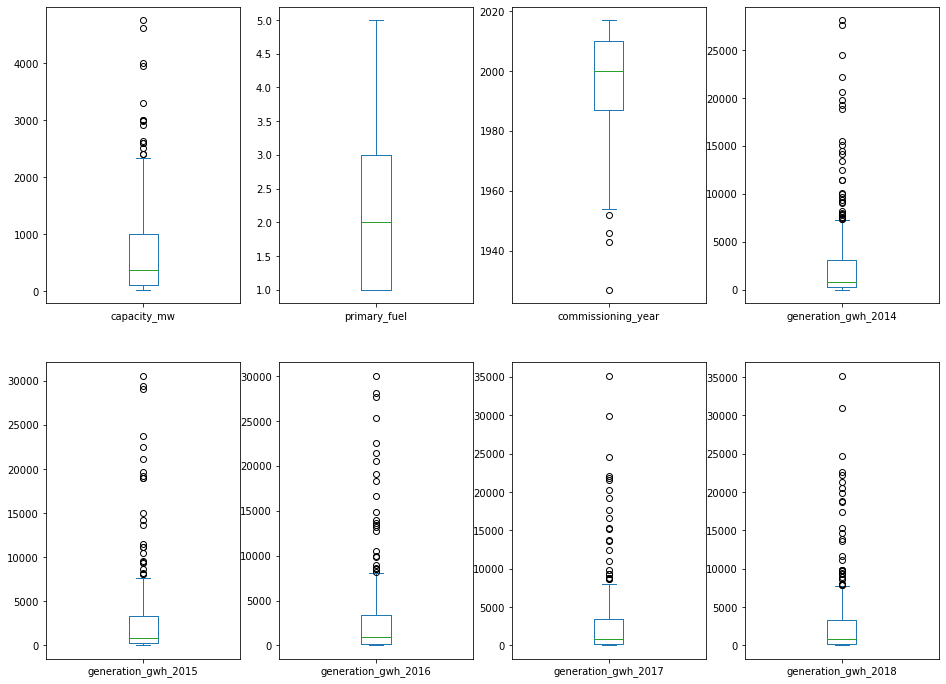

In [40]:
df.plot(kind='box',subplots=True,layout=(2,4),figsize=(16,12)) 
plt.show()

From above Boxplots we can see that Outliers are present in all Columns except 'Primary Fuel'.

Splitting data into Target & Independent columns

In [41]:
x=df.iloc[:,1:]     #Independent Columns

y=pd.DataFrame(df.iloc[:,0],index = df.index)   #Target Column

Removing Outliers using Z-score

In [42]:
from scipy.stats import zscore               # Removing Outliers from independent variables
z=np.abs(zscore(x))
z

,primary_fuel,commissioning_year,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,0.102065,0.476983,0.458965,0.407209,0.402877,0.459089,0.471934
1,1.075419,1.149607,0.138805,0.771122,0.838756,0.624487,1.002644
2,1.075419,0.538131,0.326535,0.322398,0.335717,0.347987,0.394265
3,0.871289,1.602037,0.572754,0.567851,0.593997,0.590846,0.600028
4,0.871289,0.843869,0.444971,0.435644,0.451615,0.455458,0.482334
...,...,...,...,...,...,...,...
386,0.871289,0.599278,0.164978,0.323386,0.137298,0.118003,0.184650
387,1.075419,0.623675,1.058128,0.595781,0.212175,0.999150,1.069871
388,1.075419,0.843869,0.353138,0.219653,0.323267,0.382121,0.402303
389,0.871289,0.317936,0.566104,0.560695,0.560892,0.571056,0.558322


In [43]:
# Now to take out the ouliers taking threshold 3
# All values with Z-score >3 will be considered as ouliers
# Making a new file for values with z-score<3

threshold=3
x1=x[(z<3).all(axis=1)]
x1

,primary_fuel,commissioning_year,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2,2004.0,617.789264,843.74700,886.004428,663.774500,626.239128
1,1,2015.0,3035.550000,5916.37000,6243.000000,5385.579736,7279.000000
2,1,2005.0,1153.421000,1208.85200,1175.765000,1147.913000,976.655000
3,3,1970.0,157.558250,152.19520,61.421350,89.629600,48.327150
4,3,2010.0,674.391100,721.33520,675.724400,679.594950,579.318850
...,...,...,...,...,...,...,...
386,3,2006.0,1806.860300,1204.59675,2031.839750,2150.095500,1922.359900
387,1,1986.0,6753.870000,5161.53800,3539.630000,7018.217000,7582.300000
388,1,2010.0,1045.820000,1651.15890,1229.480000,999.170000,940.390000
389,3,1991.0,184.453100,183.00000,204.253600,175.866250,236.491600


In [44]:
print(np.where(z>3)[0])

[ 10 157 157 157 157 157 212 212 212 212 212 213 213 213 213 213 248 266
 289 289 289 289 289 296 296 296 296 296 308 308 308 308 308 321 321 321
 321 321 322 336 336 336 336 336 350 350 350 350 350 385 385 385 385 385]


In [45]:
y1= y.drop(np.where(z>3)[0],axis=0)     # Dropping the rows from same locations from target varibles
y1

,capacity_mw
0,135.0
1,1800.0
2,250.0
3,60.0
4,192.0
...,...
386,400.0
387,1470.0
388,540.0
389,62.4


# Treating Skewness

In [46]:
x1.skew().sort_values(ascending=False)

generation_gwh_2014    2.019857
generation_gwh_2016    1.880018
generation_gwh_2015    1.877601
generation_gwh_2018    1.785399
generation_gwh_2017    1.738997
primary_fuel           0.255469
commissioning_year    -0.852160
dtype: float64

Taking Skewness threshold +/- 0.5. We can see that the following columns are having skewnees which needs to be removed:-
   1. generation_gwh_2014 is right skewed
   2. generation_gwh_2015 is right skewed
   3. generation_gwh_2016 is right skewed
   4. generation_gwh_2017 is right skewed
   5. generation_gwh_2018 is right skewed
   6. commissioning_year is left skewed

Using Power Transformation for removing skewnees from the data.

In [47]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson',standardize=True)

In [48]:
a = x1.loc[:,['commissioning_year','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018']]    
a.head()                     # Creating Dataframe of the columns that need to be treated

,commissioning_year,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2004.0,617.789264,843.7470,886.004428,663.774500,626.239128
1,2015.0,3035.550000,5916.3700,6243.000000,5385.579736,7279.000000
2,2005.0,1153.421000,1208.8520,1175.765000,1147.913000,976.655000
3,1970.0,157.558250,152.1952,61.421350,89.629600,48.327150
4,2010.0,674.391100,721.3352,675.724400,679.594950,579.318850


In [49]:
a.skew().sort_values(ascending=False)

generation_gwh_2014    2.019857
generation_gwh_2016    1.880018
generation_gwh_2015    1.877601
generation_gwh_2018    1.785399
generation_gwh_2017    1.738997
commissioning_year    -0.852160
dtype: float64

In [50]:
data = pt.fit_transform(a)
a_new = pd.DataFrame(data,columns=a.columns,index=a.index)
a_new.skew()

commissioning_year    -0.313272
generation_gwh_2014   -0.114972
generation_gwh_2015   -0.118537
generation_gwh_2016   -0.122052
generation_gwh_2017   -0.139286
generation_gwh_2018   -0.132517
dtype: float64

Now we can see that the Skewnees is removed. Saving this transformed data to the original DataFrame.

In [51]:
x1['commissioning_year']=a_new['commissioning_year']
x1['generation_gwh_2014']=a_new['generation_gwh_2014']
x1['generation_gwh_2015']=a_new['generation_gwh_2015']
x1['generation_gwh_2016']=a_new['generation_gwh_2016']
x1['generation_gwh_2017']=a_new['generation_gwh_2017']
x1['generation_gwh_2018']=a_new['generation_gwh_2018']
x1.skew()

primary_fuel           0.255469
commissioning_year    -0.313272
generation_gwh_2014   -0.114972
generation_gwh_2015   -0.118537
generation_gwh_2016   -0.122052
generation_gwh_2017   -0.139286
generation_gwh_2018   -0.132517
dtype: float64

# Treating Multicollinearity

Checking Variance Inflation Factor(VIF)

In [52]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [53]:
def calc_vif(x):
    vif=pd.DataFrame()
    vif["Variables"]=x.columns
    vif["VIF FACTOR"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    return(vif)

In [54]:
calc_vif(x1)

,Variables,VIF FACTOR
0,primary_fuel,1.076074
1,commissioning_year,1.197539
2,generation_gwh_2014,4.366888
3,generation_gwh_2015,9.420170
4,generation_gwh_2016,19.416884
5,generation_gwh_2017,25.288977
6,generation_gwh_2018,13.667862


From above we can see that the 'generation_gwh_2017' column has the highest V.I.F. So we will remove it.	

In [55]:
x1.drop({'generation_gwh_2017'},axis=1,inplace=True)        
calc_vif(x1)

,Variables,VIF FACTOR
0,primary_fuel,1.075563
1,commissioning_year,1.196825
2,generation_gwh_2014,4.366441
3,generation_gwh_2015,9.385263
4,generation_gwh_2016,12.874097
5,generation_gwh_2018,6.774271


Now all the VIF Values are below 10 & acceptable.

# Data Scaling

In [56]:
x1

,primary_fuel,commissioning_year,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2018
0,2,0.392846,-0.193483,-0.043451,-0.000770,-0.194313
1,1,1.429503,0.823979,1.340523,1.362587,1.439118
2,1,0.476682,0.162561,0.169544,0.163440,0.041730
3,3,-1.560819,-0.816943,-0.854912,-1.143820,-1.189180
4,3,0.925904,-0.146477,-0.131148,-0.148975,-0.233409
...,...,...,...,...,...,...
386,3,0.562462,0.451451,0.167372,0.510429,0.447543
387,1,-0.828848,1.490888,1.223074,0.906404,1.474204
388,1,0.925904,0.103333,0.368396,0.190284,0.020744
389,3,-0.538609,-0.754558,-0.781665,-0.709652,-0.639030


There is no need of Data Scaling as we can see that the data is already in same scale.

# Splitting the Data

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression 
lm = LinearRegression()

Finding out best random state.

In [58]:
for i in range(0,500):
    x1_train,x1_test,y1_train,y1_test= train_test_split(x1,y1,random_state=i,test_size=0.22)
    lm.fit(x1_train,y1_train)
    pred_train = lm.predict(x1_train)
    pred_test = lm.predict(x1_test)
    if round(r2_score(y1_train,pred_train)*100,1) == round(r2_score(y1_test,pred_test)*100,1):
        print("At random state",i,"the Model performs very well")
        print(f"For {i},the training accuracy is :- {r2_score(y1_train,pred_train)*100}")
        print(f"For {i},the testing accuracy is :- {r2_score(y1_test,pred_test)*100}")
        print(f"For {i},the Mean squared error is :- {mean_squared_error(y1_test,pred_test)}")
        print("\n")

At random state 93 the Model performs very well
For 93,the training accuracy is :- 60.58142856100084
For 93,the testing accuracy is :- 60.59184912652502
For 93,the Mean squared error is :- 109310.52874155056


At random state 128 the Model performs very well
For 128,the training accuracy is :- 61.02874827442826
For 128,the testing accuracy is :- 61.03297133480834
For 128,the Mean squared error is :- 129842.07444065581


At random state 262 the Model performs very well
For 262,the training accuracy is :- 60.817617980115344
For 262,the testing accuracy is :- 60.84741192761718
For 262,the Mean squared error is :- 123755.37066369683


At random state 378 the Model performs very well
For 378,the training accuracy is :- 60.880344969389434
For 378,the testing accuracy is :- 60.929344064717405
For 378,the Mean squared error is :- 116617.96161123064


At random state 441 the Model performs very well
For 441,the training accuracy is :- 60.55949408547507
For 441,the testing accuracy is :- 60.6224

In [59]:
for i in range(0,1000):
    x1_train,x1_test,y1_train,y1_test= train_test_split(x1,y1,random_state=i,test_size=0.22)
    lm.fit(x1_train,y1_train)
    pred_train = lm.predict(x1_train)
    pred_test = lm.predict(x1_test)
    if round(r2_score(y1_test,pred_test)*100,1) > 70.0 :
        print("At random state",i,"the Model performs very well")
        print(f"For {i},the training accuracy is :- {r2_score(y1_train,pred_train)*100}")
        print(f"For {i},the testing accuracy is :- {r2_score(y1_test,pred_test)*100}")
        print(f"For {i},the Mean squared error is :- {mean_squared_error(y1_test,pred_test)}")
        print("\n")

At random state 91 the Model performs very well
For 91,the training accuracy is :- 59.09412253426625
For 91,the testing accuracy is :- 70.11815362660985
For 91,the Mean squared error is :- 73767.61736067582


At random state 145 the Model performs very well
For 145,the training accuracy is :- 58.31117995806751
For 145,the testing accuracy is :- 70.11776836632765
For 145,the Mean squared error is :- 96209.77688247306


At random state 156 the Model performs very well
For 156,the training accuracy is :- 58.46287486879373
For 156,the testing accuracy is :- 70.7462016543301
For 156,the Mean squared error is :- 90006.66905767885


At random state 185 the Model performs very well
For 185,the training accuracy is :- 58.52320226731182
For 185,the testing accuracy is :- 70.72243930472962
For 185,the Mean squared error is :- 88491.02509440087


At random state 190 the Model performs very well
For 190,the training accuracy is :- 58.69767083673537
For 190,the testing accuracy is :- 71.755161621548

From above we can see that Model is performing best at Random State = 265. Beacuse for random state=265 Model's testing accuracy is Highest. And Model is getting least mean squared error.

Therefore, using Random State = 265 for further working & Splitting the DataFrame.

In [60]:
x1_train,x1_test,y1_train,y1_test= train_test_split(x1,y1,random_state=265,test_size=0.22)

In [61]:
x1_train.shape

(294, 6)

In [62]:
x1_test.shape

(83, 6)

In [63]:
y1_train.shape

(294, 1)

In [64]:
y1_test.shape

(83, 1)

# Testing with Different Models.

In [65]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, Ridge
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [66]:
lm = LinearRegression()
ls  = Lasso(alpha=0.0001)
rd = Ridge(alpha=0.0001)
svr = SVR(kernel='rbf')
dtc = DecisionTreeRegressor()

models = [lm,ls,rd,svr,dtc]

for i in models:
    i.fit(x1_train,y1_train)
    pred_train = i.predict(x1_train)
    pred_test = i.predict(x1_test)
    print(f"For {i},the training accuracy is :- {r2_score(y1_train,pred_train)*100}")
    print(f"For {i},the testing accuracy is :- {r2_score(y1_test,pred_test)*100}")
    print(f"For {i},the Mean squared error is :- {mean_squared_error(y1_test,pred_test)}")
    print("\n")

For LinearRegression(),the training accuracy is :- 58.42258153821665
For LinearRegression(),the testing accuracy is :- 72.56565558303636
For LinearRegression(),the Mean squared error is :- 68703.9425266249


For Lasso(alpha=0.0001),the training accuracy is :- 58.42258153821089
For Lasso(alpha=0.0001),the testing accuracy is :- 72.5656553317374
For Lasso(alpha=0.0001),the Mean squared error is :- 68703.94315595394


For Ridge(alpha=0.0001),the training accuracy is :- 58.42258153821264
For Ridge(alpha=0.0001),the testing accuracy is :- 72.5656562397736
For Ridge(alpha=0.0001),the Mean squared error is :- 68703.94088195512


For SVR(),the training accuracy is :- 0.015001795139690799
For SVR(),the testing accuracy is :- 9.565796488404255
For SVR(),the Mean squared error is :- 226474.75099350058


For DecisionTreeRegressor(),the training accuracy is :- 99.99633972894179
For DecisionTreeRegressor(),the testing accuracy is :- 67.62168229962822
For DecisionTreeRegressor(),the Mean squared erro

From above we can see that the LinearRegression(),Lasso(),Ridge() are working well with the data.

# Ensemble Techniques

Using various Bagging & Boosting Ensemble Algorithms to increase the model performance.

In [67]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [68]:
rf = RandomForestRegressor()
br = BaggingRegressor()
ad = AdaBoostRegressor()
gb = GradientBoostingRegressor()

models = [rf,br,ad,gb]

for i in models:
    i.fit(x1_train,y1_train)
    pred_train = i.predict(x1_train)
    pred_test = i.predict(x1_test)
    print(f"For {i},the training accuracy is :- {r2_score(y1_train,pred_train)*100}")
    print(f"For {i},the testing accuracy is :- {r2_score(y1_test,pred_test)*100}")
    print(f"For {i},the Mean squared error is :- {mean_squared_error(y1_test,pred_test)}")
    print("\n")

For RandomForestRegressor(),the training accuracy is :- 96.70098137192008
For RandomForestRegressor(),the testing accuracy is :- 86.54335257289935
For RandomForestRegressor(),the Mean squared error is :- 33699.53797258995


For BaggingRegressor(),the training accuracy is :- 96.11286240014043
For BaggingRegressor(),the testing accuracy is :- 84.38928115829621
For BaggingRegressor(),the Mean squared error is :- 39093.98795170557


For AdaBoostRegressor(),the training accuracy is :- 80.0178800000074
For AdaBoostRegressor(),the testing accuracy is :- 69.74764099179023
For AdaBoostRegressor(),the Mean squared error is :- 75761.10815717843


For GradientBoostingRegressor(),the training accuracy is :- 96.7246951074059
For GradientBoostingRegressor(),the testing accuracy is :- 85.71733272794202
For GradientBoostingRegressor(),the Mean squared error is :- 35768.142896814395




From above ensemble methods we can see that RandomForestRegressor, BaggingRegressor & GradientBoostingRegressor are working best with the Data.

Whereas out of these, RandomForestRegressor() is performing best beacuse with the Highest Testing Accuracy & Least Mean Sqaured Error.

# Gradient Descent Algorithm

In [69]:
from sklearn.linear_model import SGDRegressor
sgd = SGDRegressor()

In [70]:
sgd.fit(x1_train,y1_train)
pred_train = sgd.predict(x1_train)
pred_test = sgd.predict(x1_test)
print("For",sgd,"the training accuracy is :-", r2_score(y1_train,pred_train)*100)
print("For",sgd,"testing accuracy is :-", r2_score(y1_test,pred_test)*100)
print("For",sgd,"the Mean squared error is :-", mean_squared_error(y1_test,pred_test))

For SGDRegressor() the training accuracy is :- 58.22828706222939
For SGDRegressor() testing accuracy is :- 71.98752211504636
For SGDRegressor() the Mean squared error is :- 70151.76456872711


SGDRegressor is not working well for the Model.

# Cross-Validation of Algorithms

Checking cross_val_scores for all the Algorithms that are performing well to know the which Algorithm is actually working best for the the Model.

In [75]:
from sklearn.model_selection import cross_val_score
model = [lm,ls,rd,rf,br,gb]

for m in model:
    pred_test = m.predict(x1_test)
    score = cross_val_score(m,x1,y1,cv=9)
    c_score = score.mean()
    print("For",m,"Cross Validation score is:-",c_score*100)
    print(f"The testing accuracy is :- {r2_score(y1_test,pred_test)*100}")
    print("\n")

For LinearRegression() Cross Validation score is:- 57.383617509378645
The testing accuracy is :- 72.56565558303636


For Lasso(alpha=0.0001) Cross Validation score is:- 57.38363301800335
The testing accuracy is :- 72.5656553317374


For Ridge(alpha=0.0001) Cross Validation score is:- 57.383623586539386
The testing accuracy is :- 72.5656562397736


For RandomForestRegressor() Cross Validation score is:- 76.03901904052617
The testing accuracy is :- 86.54335257289935


For BaggingRegressor() Cross Validation score is:- 73.91712551949954
The testing accuracy is :- 84.38928115829621


For GradientBoostingRegressor() Cross Validation score is:- 72.53945411805314
The testing accuracy is :- 85.71733272794202




Now from above we can confirm that RandomForestRegressor() is working Best for the data beacuse:-

   1. Cross Val-Score is closest to Accuracy Score in RandomForestRegressor() among all the algorithms.
   2. Cross Val-Score is highest is case of RandomForestRegressor().
   3. Mean squared error is minimum in case of RandomForestRegressor().
   
Using RandomForestRegressor() as the Final Algorithm & Optimizaztion.

# Hyperparameter tuning

In [76]:
from sklearn.model_selection import GridSearchCV
rf = RandomForestRegressor()

In [78]:
grid_param = {'n_estimators':[50,100,200,300],'criterion':['squared_error', 'absolute_error', 'poisson'],'max_features':['auto', 'sqrt', 'log2'],'max_depth':[5,6,7,8,9]}

gd_sr = GridSearchCV(estimator=rf,param_grid=grid_param,scoring='accuracy',cv=9)

gd_sr.fit(x1_train,y1_train)

best_parameters = gd_sr.best_params_
print(best_parameters)

{'criterion': 'squared_error', 'max_depth': 5, 'max_features': 'auto', 'n_estimators': 50}
nan


In [79]:
gd_sr.best_estimator_

RandomForestRegressor(max_depth=5, max_features='auto', n_estimators=50)

Using these above parameters for Final training of the Model.

In [110]:
rf = RandomForestRegressor(max_depth=5, max_features='auto', n_estimators=50)

In [111]:
rf.fit(x1_train,y1_train)
pred_train = rf.predict(x1_train)
pred_test = rf.predict(x1_test)
print(f"For {rf},the training accuracy is :- {r2_score(y1_train,pred_train)*100}")
print(f"For {rf},the testing accuracy is :- {r2_score(y1_test,pred_test)*100}")
print(f"For {rf},the Mean squared error is :- {mean_squared_error(y1_test,pred_test)}")

For RandomForestRegressor(max_depth=5, max_features='auto', n_estimators=50),the training accuracy is :- 92.18915243714876
For RandomForestRegressor(max_depth=5, max_features='auto', n_estimators=50),the testing accuracy is :- 86.5990182502165
For RandomForestRegressor(max_depth=5, max_features='auto', n_estimators=50),the Mean squared error is :- 33560.13418597209


# Cross-Validation of Best Model

In [113]:
from sklearn.model_selection import cross_val_score
for i in range(2,10):
    score = cross_val_score(rf,x1,y1,cv=i)
    c_score = score.mean()
    print("At cv:-",i)
    print("Cross Validation score is:-",c_score*100)
    print("Accuracy Score of model is :-",r2_score(y1_test,pred_test)*100)
    print("\n")

At cv:- 2
Cross Validation score is:- 75.14051919938956
Accuracy Score of model is :- 86.5990182502165


At cv:- 3
Cross Validation score is:- 76.71296756612126
Accuracy Score of model is :- 86.5990182502165


At cv:- 4
Cross Validation score is:- 75.92743379666464
Accuracy Score of model is :- 86.5990182502165


At cv:- 5
Cross Validation score is:- 77.08842463737838
Accuracy Score of model is :- 86.5990182502165


At cv:- 6
Cross Validation score is:- 76.17305589356563
Accuracy Score of model is :- 86.5990182502165


At cv:- 7
Cross Validation score is:- 75.60182670229523
Accuracy Score of model is :- 86.5990182502165


At cv:- 8
Cross Validation score is:- 76.34019773572136
Accuracy Score of model is :- 86.5990182502165


At cv:- 9
Cross Validation score is:- 74.61002516248708
Accuracy Score of model is :- 86.5990182502165




Accuracy score is closest to Cross Val Score at cv = 3. Using cv=3 for final validation.

In [124]:
rf.fit(x1_train,y1_train)
pred_test=rf.predict(x1_test)
score = cross_val_score(rf,x1,y1,cv=5)
c_score = score.mean()
print("For",rf,"Cross Validation score is:-",round(c_score*100))
print('Accuracy Score of',rf,'is:',round(r2_score(y1_test,pred_test)*100))

For RandomForestRegressor(max_depth=5, max_features='auto', n_estimators=50) Cross Validation score is:- 77
Accuracy Score of RandomForestRegressor(max_depth=5, max_features='auto', n_estimators=50) is: 86


# Saving the best Model

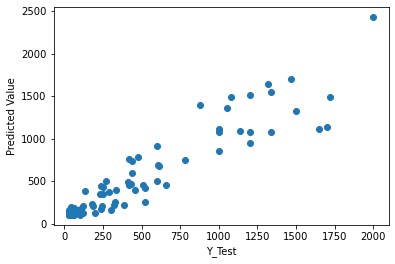

In [125]:
plt.scatter(x=y1_test,y=pred_test)
plt.xlabel("Y_Test")
plt.ylabel("Predicted Value")
plt.show()

From above scatter plot we can see that the Actual Values & the Predicted Values are close to each other.

In [126]:
import pickle

filename = 'Global Power Plant Capacity.pkl'

pickle.dump(rf, open(filename,'wb')) 

# Conclusion

In [128]:
loaded_model = pickle.load(open('Global Power Plant Capacity.pkl','rb'))
result = loaded_model.score(x1_train,y1_train)
print(result)

0.9203044746671548


# Task 2. Predicting the Primary Fuel 

# Data Preparation

Splitting data into Target & Independent columns

In [131]:
df

,capacity_mw,primary_fuel,commissioning_year,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,135.0,2,2004.0,617.789264,843.74700,886.004428,663.774500,626.239128
1,1800.0,1,2015.0,3035.550000,5916.37000,6243.000000,5385.579736,7279.000000
2,250.0,1,2005.0,1153.421000,1208.85200,1175.765000,1147.913000,976.655000
3,60.0,3,1970.0,157.558250,152.19520,61.421350,89.629600,48.327150
4,192.0,3,2010.0,674.391100,721.33520,675.724400,679.594950,579.318850
...,...,...,...,...,...,...,...,...
386,400.0,3,2006.0,1806.860300,1204.59675,2031.839750,2150.095500,1922.359900
387,1470.0,1,1986.0,6753.870000,5161.53800,3539.630000,7018.217000,7582.300000
388,540.0,1,2010.0,1045.820000,1651.15890,1229.480000,999.170000,940.390000
389,62.4,3,1991.0,184.453100,183.00000,204.253600,175.866250,236.491600


In [143]:
x=df[['capacity_mw','commissioning_year','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018']]     #Independent Columns

y=df.iloc[:,1]   #Target Column

# Data Balancing

In [144]:
y.value_counts()

3    166
1    160
2     51
5      7
4      7
Name: primary_fuel, dtype: int64

As we can see that the no. of entries for each fuel type is very different. Using SMOTE to Balance the data.

In [146]:
from imblearn.over_sampling import SMOTE
sm=SMOTE()
dx,dy=sm.fit_resample(x,y)
dy

0      2
1      1
2      1
3      3
4      3
      ..
825    5
826    5
827    5
828    5
829    5
Name: primary_fuel, Length: 830, dtype: int32

In [149]:
dy.value_counts()

2    166
1    166
3    166
5    166
4    166
Name: primary_fuel, dtype: int64

Now we can see that the Data is Balanced.

In [151]:
dy = pd.DataFrame(dy)
dy

,primary_fuel
0,2
1,1
2,1
3,3
4,3
...,...
825,5
826,5
827,5
828,5


# Treating Outliers

Removing Outliers using Z-score

In [153]:
from scipy.stats import zscore               # Removing Outliers from independent variables
z=np.abs(zscore(dx))
z

,capacity_mw,commissioning_year,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,0.657072,0.547339,0.470366,0.400723,0.385794,0.456773,0.457663
1,1.980612,1.456945,0.234281,0.996131,1.077603,0.818376,1.299732
2,0.474889,0.630031,0.314258,0.300184,0.306639,0.326029,0.365097
3,0.775886,2.264171,0.604498,0.591157,0.611050,0.611824,0.610325
4,0.566773,1.043488,0.453869,0.434432,0.443237,0.452501,0.470058
...,...,...,...,...,...,...,...
825,0.663339,0.122886,0.618940,0.612626,0.622305,0.635917,0.622652
826,0.609149,0.404358,0.650418,0.633067,0.627828,0.636029,0.623091
827,0.746105,0.054860,0.619746,0.612188,0.621976,0.635869,0.622646
828,0.802473,0.133882,0.643612,0.628648,0.626634,0.636005,0.622996


In [166]:
# Now to take out the ouliers taking threshold 3
# All values with Z-score >3 will be considered as ouliers
# Making a new file for values with z-score<3

threshold=3
x2=dx[(z<3).all(axis=1)]
x2

,capacity_mw,commissioning_year,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,135.000000,2004.000000,617.789264,843.747000,886.004428,663.774500,626.239128
1,1800.000000,2015.000000,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
2,250.000000,2005.000000,1153.421000,1208.852000,1175.765000,1147.913000,976.655000
3,60.000000,1970.000000,157.558250,152.195200,61.421350,89.629600,48.327150
4,192.000000,2010.000000,674.391100,721.335200,675.724400,679.594950,579.318850
...,...,...,...,...,...,...,...
825,131.043684,1995.894863,108.007228,74.228530,20.220150,0.415376,1.660102
826,165.250370,1992.490989,0.000000,0.000000,0.000000,0.000000,0.000000
827,78.798741,1998.044375,105.242102,75.822080,21.421530,0.593266,1.684026
828,43.217751,1999.000000,23.351205,16.048237,4.371604,0.089804,0.358915


In [167]:
print(np.where(z>3)[0])

[ 10  10  10  58  58  58  58  84  89  90 100 123 123 123 123 123 145 157
 157 157 157 157 157 162 188 194 205 210 212 212 212 212 212 212 213 213
 213 213 213 213 220 248 257 261 266 289 289 289 289 289 289 296 296 296
 296 296 296 308 308 308 308 308 308 312 318 318 318 320 320 320 320 321
 321 321 321 321 321 322 333 334 336 336 336 336 336 336 350 350 350 350
 350 350 385 385 385 385 385 385 394 394 394 394 394 394 396 396 396 396
 396 396]


In [168]:
y2= dy.drop(np.where(z>3)[0],axis=0)     # Dropping the rows from same locations from target varibles
y2

,primary_fuel
0,2
1,1
2,1
3,3
4,3
...,...
825,5
826,5
827,5
828,5


In [169]:
x2.shape

(794, 7)

# Treating Skewness

In [170]:
x2.skew().sort_values(ascending=False)

generation_gwh_2014    1.332776
generation_gwh_2018    1.314869
generation_gwh_2015    1.310620
generation_gwh_2016    1.254381
capacity_mw            1.229268
generation_gwh_2017    1.116131
commissioning_year    -0.852722
dtype: float64

Taking Skewness threshold +/- 0.5. We can see that the following columns are having skewnees which needs to be removed:-

   1. generation_gwh_2014
   2. generation_gwh_2015
   3. generation_gwh_2016
   4. generation_gwh_2017
   5. generation_gwh_2018
   6. capacity_mw
   7. commissioning_year
   
All, these above columns are Right Skewed except commissioning_year.

Handling Right Skewed Data

In [171]:
x2['generation_gwh_2014']=np.cbrt(x2['generation_gwh_2014'])
x2['generation_gwh_2015']=np.cbrt(x2['generation_gwh_2015'])
x2['generation_gwh_2016']=np.cbrt(x2['generation_gwh_2016'])
x2['generation_gwh_2017']=np.cbrt(x2['generation_gwh_2017'])
x2['generation_gwh_2018']=np.cbrt(x2['generation_gwh_2018'])
x2['capacity_mw']=np.cbrt(x2['capacity_mw'])
x2.skew()

capacity_mw            0.257808
commissioning_year    -0.852722
generation_gwh_2014    0.050707
generation_gwh_2015    0.089247
generation_gwh_2016    0.135043
generation_gwh_2017    0.122791
generation_gwh_2018    0.118587
dtype: float64

Handling Left Skewed Data

In [173]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson',standardize=True)

In [177]:
a = x2.loc[:,['commissioning_year']]    
a.head() 

,commissioning_year
0,2004.0
1,2015.0
2,2005.0
3,1970.0
4,2010.0


In [178]:
a.skew()

commissioning_year   -0.852722
dtype: float64

In [179]:
data = pt.fit_transform(a)
a_new = pd.DataFrame(data,columns=a.columns,index=a.index)
a_new.skew()

commissioning_year   -0.080432
dtype: float64

Now we can see that the Skewnees is removed. Saving this transformed data to the original DataFrame.

In [180]:
x2['commissioning_year']=a_new['commissioning_year']
x2.skew()

capacity_mw            0.257808
commissioning_year    -0.080432
generation_gwh_2014    0.050707
generation_gwh_2015    0.089247
generation_gwh_2016    0.135043
generation_gwh_2017    0.122791
generation_gwh_2018    0.118587
dtype: float64

Now all the Skewness Values are in Acceptable Range i.e. b/w +/-0.5.

# Treating Multicollinearity

Checking Variance Inflation Factor(VIF)

In [181]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [182]:
def calc_vif(x):
    vif=pd.DataFrame()
    vif["Variables"]=x.columns
    vif["VIF FACTOR"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    return(vif)

In [183]:
calc_vif(x2)

,Variables,VIF FACTOR
0,capacity_mw,9.294009
1,commissioning_year,1.190276
2,generation_gwh_2014,28.576581
3,generation_gwh_2015,56.224803
4,generation_gwh_2016,119.342173
5,generation_gwh_2017,129.825768
6,generation_gwh_2018,83.881977


Removing the Column with Highest VIF Value

In [184]:
x2.drop({'generation_gwh_2017'},axis=1,inplace=True)          
calc_vif(x2)

,Variables,VIF FACTOR
0,capacity_mw,9.250252
1,commissioning_year,1.190042
2,generation_gwh_2014,28.491055
3,generation_gwh_2015,53.759436
4,generation_gwh_2016,75.658267
5,generation_gwh_2018,45.093321


In [185]:
x2.drop({'generation_gwh_2016'},axis=1,inplace=True)           
calc_vif(x2)

,Variables,VIF FACTOR
0,capacity_mw,9.161602
1,commissioning_year,1.171763
2,generation_gwh_2014,28.486326
3,generation_gwh_2015,41.444918
4,generation_gwh_2018,21.836439


V.I.F. Values have now been reduced significantly.

# Data Scaling

In [189]:
x2

,capacity_mw,commissioning_year,generation_gwh_2014,generation_gwh_2015,generation_gwh_2018
0,5.129928,0.511019,8.516872,9.449397,8.555526
1,12.164404,1.958115,14.479241,18.086385,19.380155
2,6.299605,0.628050,10.487274,10.652651,9.921570
3,3.914868,-2.216293,5.401077,5.339087,3.642479
4,5.768998,1.255133,8.769415,8.968346,8.336285
...,...,...,...,...,...
825,5.079318,-0.344661,4.762309,4.202654,1.184072
826,5.487579,-0.659106,0.000000,0.000000,0.000000
827,4.287194,-0.133021,4.721317,4.232516,1.189733
828,3.509302,-0.035519,2.858269,2.522372,0.710663


As we can see all columns are almost in same scale. So not Scaling the data further.

# Splitting the Data

In [190]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [197]:
for i in range(0,400):
    x2_train,x2_test,y2_train,y2_test= train_test_split(x2,y2,random_state=i,test_size=0.22)
    knn.fit(x2_train,y2_train)
    pred_train=knn.predict(x2_train)
    pred_test=knn.predict(x2_test)
    if round(accuracy_score(y2_test,pred_test)*100,1) > 85.0:
        print("At random state",i,"The model preforms very well")
        print("Training Accuracy score is :-",accuracy_score(y2_train,pred_train)*100)
        print("Model Accuracy score is :-",accuracy_score(y2_test,pred_test)*100,'\n')

At random state 257 The model preforms very well
Training Accuracy score is :- 84.00646203554119
Model Accuracy score is :- 85.14285714285714 

At random state 263 The model preforms very well
Training Accuracy score is :- 83.84491114701132
Model Accuracy score is :- 85.71428571428571 

At random state 398 The model preforms very well
Training Accuracy score is :- 84.16801292407108
Model Accuracy score is :- 85.71428571428571 



From above we can see that Model is performing best at Random State = 398. Beacuse for random state= 398 Model's has the Highest accuracy score & is also closest to the Training Accuracy Score.

Therefore, using Random State = 398 for further working & Splitting the DataFrame.

In [199]:
x2_train,x2_test,y2_train,y2_test= train_test_split(x2,y2,random_state=398,test_size=0.22)

In [200]:
x2_train.shape

(619, 5)

In [201]:
y2_train.shape

(619, 1)

In [202]:
x2_test.shape

(175, 5)

In [203]:
y2_test.shape

(175, 1)

# Testing with Different Models

In [220]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [221]:
knn = KNeighborsClassifier()
svc = SVC()
dtc = DecisionTreeClassifier()

model = [knn,svc,dtc]

for m in model:
    m.fit(x2_train,y2_train)
    pred_test=m.predict(x2_test)
    print('Accuracy Score of',m,'is:',accuracy_score(y2_test,pred_test))
    print(confusion_matrix(y2_test,pred_test))
    print(classification_report(y2_test,pred_test))
    print('\n')

Accuracy Score of KNeighborsClassifier() is: 0.8571428571428571
[[17  3  1  5  0]
 [ 3 32  1  1  1]
 [ 1  6 26  2  1]
 [ 0  0  0 36  0]
 [ 0  0  0  0 39]]
              precision    recall  f1-score   support

           1       0.81      0.65      0.72        26
           2       0.78      0.84      0.81        38
           3       0.93      0.72      0.81        36
           4       0.82      1.00      0.90        36
           5       0.95      1.00      0.97        39

    accuracy                           0.86       175
   macro avg       0.86      0.84      0.84       175
weighted avg       0.86      0.86      0.85       175



Accuracy Score of SVC() is: 0.7542857142857143
[[ 5  8  0 11  2]
 [ 1 32  2  1  2]
 [ 0 13 20  3  0]
 [ 0  0  0 36  0]
 [ 0  0  0  0 39]]
              precision    recall  f1-score   support

           1       0.83      0.19      0.31        26
           2       0.60      0.84      0.70        38
           3       0.91      0.56      0.69        36

From above we can see that KNeighborsClassifier() is performing best with the data among other algorithms.

# Ensemble Techniques

Using various Bagging & Boosting Ensemble methods to train the data to increase the model performance.

In [222]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [223]:
rf = RandomForestClassifier()
bg = BaggingClassifier()
ad = AdaBoostClassifier()
gb = GradientBoostingClassifier()

model = [rf,bg,ad,gb]

for m in model:
    m.fit(x2_train,y2_train)
    pred_test=m.predict(x2_test)
    print('Accuracy Score of',m,'is:',accuracy_score(y2_test,pred_test))
    print(confusion_matrix(y2_test,pred_test))
    print(classification_report(y2_test,pred_test))
    print('\n')

Accuracy Score of RandomForestClassifier() is: 0.8571428571428571
[[19  3  2  2  0]
 [ 3 33  2  0  0]
 [ 1  7 26  2  0]
 [ 3  0  0 33  0]
 [ 0  0  0  0 39]]
              precision    recall  f1-score   support

           1       0.73      0.73      0.73        26
           2       0.77      0.87      0.81        38
           3       0.87      0.72      0.79        36
           4       0.89      0.92      0.90        36
           5       1.00      1.00      1.00        39

    accuracy                           0.86       175
   macro avg       0.85      0.85      0.85       175
weighted avg       0.86      0.86      0.86       175



Accuracy Score of BaggingClassifier() is: 0.8114285714285714
[[18  3  3  2  0]
 [ 5 29  3  0  1]
 [ 3  7 25  1  0]
 [ 4  0  0 32  0]
 [ 0  1  0  0 38]]
              precision    recall  f1-score   support

           1       0.60      0.69      0.64        26
           2       0.72      0.76      0.74        38
           3       0.81      0.69    

From above we can see that RandomForestClassifier(), BaggingClassifier() & GradientBoostingClassifier() are working well with the Model. 

Whereas, RandomForestClassifier() is working best for the data with the highest accuracy.

# Gradient Descent Algorithm

In [224]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier()

In [225]:
sgd.fit(x2_train,y2_train)
pred_test=sgd.predict(x2_test)
print('Accuracy Score of',sgd,'is:',accuracy_score(y2_test,pred_test))
print(confusion_matrix(y2_test,pred_test))
print(classification_report(y2_test,pred_test))

Accuracy Score of SGDClassifier() is: 0.7314285714285714
[[ 1 13  0 11  1]
 [ 0 35  2  0  1]
 [ 0 15 18  2  1]
 [ 1  0  0 35  0]
 [ 0  0  0  0 39]]
              precision    recall  f1-score   support

           1       0.50      0.04      0.07        26
           2       0.56      0.92      0.69        38
           3       0.90      0.50      0.64        36
           4       0.73      0.97      0.83        36
           5       0.93      1.00      0.96        39

    accuracy                           0.73       175
   macro avg       0.72      0.69      0.64       175
weighted avg       0.74      0.73      0.68       175



Gradient Descent is not working well with the data.

# Cross-Validation of Algorithms

Checking cross_val_scores for all the Algorithms that are performing well to know the which Algorithm is actually working best for the the Model.

In [229]:
from sklearn.model_selection import cross_val_score
model = [knn,dtc,rf,bg,gb]

for m in model:
    pred_test=m.predict(x2_test)
    score = cross_val_score(m,x2,y2,cv=5)
    c_score = score.mean()
    print("For",m,"Cross Validation score is:-",c_score*100)
    print('Accuracy Score of',m,'is:',accuracy_score(y2_test,pred_test)*100)
    print("\n")

For KNeighborsClassifier() Cross Validation score is:- 78.21511026192182
Accuracy Score of KNeighborsClassifier() is: 85.71428571428571


For DecisionTreeClassifier() Cross Validation score is:- 79.10198232624792
Accuracy Score of DecisionTreeClassifier() is: 80.0


For RandomForestClassifier() Cross Validation score is:- 83.1263434439933
Accuracy Score of RandomForestClassifier() is: 85.71428571428571


For BaggingClassifier() Cross Validation score is:- 82.62638324974127
Accuracy Score of BaggingClassifier() is: 81.14285714285714


For GradientBoostingClassifier() Cross Validation score is:- 80.9832019743651
Accuracy Score of GradientBoostingClassifier() is: 81.71428571428572




Now from above we can confirm that RandomForestClassifier() is working Best for the data as:-

   1. Cross Val-Score is highest is case of RandomForestClassifier().
   2. Also, Cross Val-Score & Accuracy score are very close for RandomForestClassifier()
   
Therefore, Using RandomForestClassifier() as the Final Algorithm & Optimizaztion.

# Hyperparameter tuning

Using GridSearchCV for further Model optimization.

In [215]:
from sklearn.model_selection import GridSearchCV
rf = RandomForestClassifier()

In [216]:
grid_param = {'n_estimators':[50,100,200,300],'criterion':['gini','entropy'],'max_features':['auto', 'sqrt', 'log2'],'max_depth':[5,6,7,8,9]}

gd_sr = GridSearchCV(estimator=rf,param_grid=grid_param,scoring='accuracy',cv=5)

gd_sr.fit(x2_train,y2_train)

best_parameters = gd_sr.best_params_
print(best_parameters)

{'criterion': 'entropy', 'max_depth': 9, 'max_features': 'log2', 'n_estimators': 300}


In [217]:
best_result = gd_sr.best_score_
print(best_result)

0.8303566745344872


In [233]:
gd_sr.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=9, max_features='log2',
                       n_estimators=300)

Using these above parameters for Final training of the Model.

In [234]:
rf = RandomForestClassifier(criterion='entropy', max_depth=9, max_features='log2', n_estimators=300)

In [235]:
rf.fit(x2_train,y2_train)
pred_test=rf.predict(x2_test)
print('Accuracy Score of',rf,'is:',accuracy_score(y2_test,pred_test))
print(confusion_matrix(y2_test,pred_test))
print(classification_report(y2_test,pred_test))

Accuracy Score of RandomForestClassifier(criterion='entropy', max_depth=9, max_features='log2',
                       n_estimators=300) is: 0.8628571428571429
[[16  3  3  4  0]
 [ 2 36  0  0  0]
 [ 0  8 26  2  0]
 [ 2  0  0 34  0]
 [ 0  0  0  0 39]]
              precision    recall  f1-score   support

           1       0.80      0.62      0.70        26
           2       0.77      0.95      0.85        38
           3       0.90      0.72      0.80        36
           4       0.85      0.94      0.89        36
           5       1.00      1.00      1.00        39

    accuracy                           0.86       175
   macro avg       0.86      0.85      0.85       175
weighted avg       0.87      0.86      0.86       175



We can see that the Accuracy Score has improved after Hyperparameter Tuning.

# Cross-Validation of Best Model

In [236]:
from sklearn.model_selection import cross_val_score
for i in range(2,10):
    score = cross_val_score(rf,x2,y2,cv=i)
    c_score = score.mean()
    print("At cv:-",i)
    print("Cross Validation score is:-",c_score*100)
    print("Accuracy Score of model is :-",accuracy_score(y2_test,pred_test)*100)
    print("\n")

At cv:- 2
Cross Validation score is:- 82.49370277078086
Accuracy Score of model is :- 86.28571428571429


At cv:- 3
Cross Validation score is:- 82.36849628359062
Accuracy Score of model is :- 86.28571428571429


At cv:- 4
Cross Validation score is:- 83.12522206994569
Accuracy Score of model is :- 86.28571428571429


At cv:- 5
Cross Validation score is:- 82.87477111694929
Accuracy Score of model is :- 86.28571428571429


At cv:- 6
Cross Validation score is:- 83.25358851674642
Accuracy Score of model is :- 86.28571428571429


At cv:- 7
Cross Validation score is:- 84.76611883691528
Accuracy Score of model is :- 86.28571428571429


At cv:- 8
Cross Validation score is:- 83.25631313131314
Accuracy Score of model is :- 86.28571428571429


At cv:- 9
Cross Validation score is:- 83.63551242764726
Accuracy Score of model is :- 86.28571428571429




Accuracy score is closest to Cross Val Score at cv = 7. Using cv=7 for final Model validation.

In [240]:
rf.fit(x2_train,y2_train)
pred_test=rf.predict(x2_test)
score = cross_val_score(rf,x2,y2,cv=7)
c_score = score.mean()
print("For",rf,"Cross Validation score is:-",c_score*100)
print('Accuracy Score of',rf,'is:',accuracy_score(y2_test,pred_test)*100)

For RandomForestClassifier(criterion='entropy', max_depth=9, max_features='log2',
                       n_estimators=300) Cross Validation score is:- 84.13289861822697
Accuracy Score of RandomForestClassifier(criterion='entropy', max_depth=9, max_features='log2',
                       n_estimators=300) is: 86.28571428571429


# Saving the best Model

In [244]:
import pickle

filename = 'Global Power Plant Primary Fuel.pkl'

pickle.dump(rf, open(filename,'wb'))  

# Conclusion

In [245]:
loaded_model = pickle.load(open('Global Power Plant Primary Fuel.pkl','rb'))
result = loaded_model.score(x2_test,y2_test)
print(result)

0.8628571428571429


In [246]:
original=np.array(y2_test).reshape(-1)
predicted=np.array(loaded_model.predict(x2_test)).reshape(-1)
conclusion = pd.DataFrame({"Original":original,"Predicted":predicted}, index= range(len(original)))
conclusion

,Original,Predicted
0,5,5
1,2,2
2,2,1
3,5,5
4,3,3
...,...,...
170,4,4
171,2,2
172,2,2
173,4,4


From above we can see that most of the predicted & original values are matching. Hence our model is performing good.